In [1]:
import pickle

import numpy as np

import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from libs.container import Container
from libs.display import d
from libs.experiment import KFoldExperiment, WithAnotherExperiment, roc

In [2]:
skl = pickle.load(open("data/o3o4vZ/scalers/scaler_5k.pkl"))

In [60]:
lines = """
        b278 & K-fold & 0.94 & 0.85 & 0.99 & 0.93 & 0.79 & 0.99 & 0.93 & 0.65 & 0.99 \\
        b278   & b261   & 0.94 & 0.88 & 0.99 & 0.93 & 0.84 & 0.99 & 0.96 & 0.74 & 0.98 \\
        b278   & b262   & 0.97 & 0.85 & 0.99 & 0.97 & 0.78 & 0.99 & 0.97 & 0.67 & 0.99 \\
        b278   & b263   & 0.96 & 0.86 & 0.99 & 0.97 & 0.77 & 0.99 & 0.92 & 0.67 & 0.99 \\
        b278   & b264   & 0.95 & 0.92 & 0.99 & 0.96 & 0.85 & 0.99 & 0.93 & 0.75 & 0.99 \\
        b261 & b278   & 0.97 & 0.69 & 0.99 & 0.97 & 0.67 & 0.99 & 0.97 & 0.57 & 0.99 \\
        b261   & b262   & 0.98 & 0.77 & 0.99 & 0.98 & 0.73 & 0.99 & 0.98 & 0.63 & 0.99 \\
        b261   & b263   & 0.98 & 0.80 & 0.99 & 0.99 & 0.73 & 0.99 & 0.96 & 0.64 & 0.99 \\
        b261   & b264   & 0.98 & 0.85 & 0.99 & 0.99 & 0.76 & 0.99 & 0.96 & 0.69 & 0.99 \\
        b261 + b278   & b262 & 0.98 & 0.85 & 0.99 & 0.97 & 0.79 & 0.99 & 0.97 & 0.69 & 0.99 \\
        b261 + b278          & b263 & 0.97 & 0.85 & 0.99 & 0.98 & 0.79 & 0.99 & 0.93 & 0.70 & 0.99 \\
        b261 + b278            & b264 & 0.97 & 0.92 & 0.99 & 0.97 & 0.84 & 0.99 & 0.94 & 0.74 & 0.99 \\
        b261 + b278 + b264      & b262 & 0.98 & 0.86 & 0.99 & 0.97 & 0.81 & 0.99 & 0.97 & 0.70 & 0.99 \\
        b261 + b278 + b264      & b263 & 0.97 & 0.87 & 0.99 & 0.97 & 0.80 & 0.99 & 0.94 & 0.70 & 0.99 \\
"""

In [69]:
smtx = []
for l in lines.splitlines():
    l = l.strip().replace("\\", "")
    if l:
        smtx.append([e.strip() for e in l.split("&") if e.strip()])

In [74]:
fmtx = []
for r in smtx:
    fmtx.append(r[:2] + list(map(float, r[2:])))

In [91]:
columns = ["Ent", "Prueba"] + list(
    "{}-{}".format(*p) for p in it.product(["M.P.", "M.M.", "M.G"], ["Prec", "Rec", "AUC"]))
df = pd.DataFrame(fmtx, columns=columns)
df = df.set_index(["Ent", "Prueba"])
df

M.P.-Prec  M.P.-Rec  M.P.-AUC  M.M.-Prec  M.M.-Rec  \
Ent                Prueba                                                       
b278               K-fold       0.94      0.85      0.99       0.93      0.79   
                   b261         0.94      0.88      0.99       0.93      0.84   
                   b262         0.97      0.85      0.99       0.97      0.78   
                   b263         0.96      0.86      0.99       0.97      0.77   
                   b264         0.95      0.92      0.99       0.96      0.85   
b261               b278         0.97      0.69      0.99       0.97      0.67   
                   b262         0.98      0.77      0.99       0.98      0.73   
                   b263         0.98      0.80      0.99       0.99      0.73   
                   b264         0.98      0.85      0.99       0.99      0.76   
b261 + b278        b262         0.98      0.85      0.99       0.97      0.79   
                   b263         0.97      0.85      0.99       0.98      0.79   
                   b264         0.97      0.92      0.99       0.97      0.84   
b261 + b278 + b264 b262         0.98      0.86      0.99       0.97      0.81   
                   b263         0.97      0.87      0.99       0.97      0.80   

                           M.M.-AUC  M.G-Prec  M.G-Rec  M.G-AUC  
Ent                Prueba                                        
b278               K-fold      0.99      0.93     0.65     0.99  
                   b261        0.99      0.96     0.74     0.98  
                   b262        0.99      0.97     0.67     0.99  
                   b263        0.99      0.92     0.67     0.99  
                   b264        0.99      0.93     0.75     0.99  
b261               b278        0.99      0.97     0.57     0.99  
                   b262        0.99      0.98     0.63     0.99  
                   b263        0.99      0.96     0.64     0.99  
                   b264        0.99      0.96     0.69     0.99  
b261 + b278        b262        0.99      0.97     0.69     0.99  
                   b263        0.99      0.93     0.70     0.99  
                   b264        0.99      0.94     0.74     0.99  
b261 + b278 + b264 b262        0.99      0.97     0.70     0.99  
                   b263        0.99      0.94     0.70     0.99

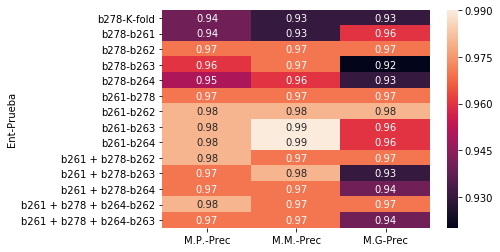

In [102]:
sns.heatmap(df[df.columns[df.columns.str.endswith("-Prec")]], annot=True);

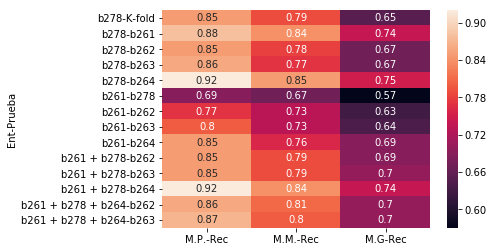

In [101]:
sns.heatmap(df[df.columns[df.columns.str.endswith("-Rec")]], annot=True)

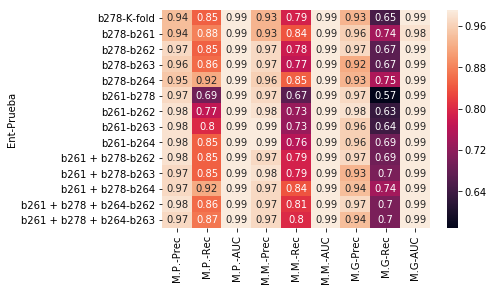

In [100]:
sns.heatmap(df, annot=True)
